In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

# Functions to create the datasets coming from one of the two models

One model is Gaussian distribution $x,y \sim N(0, size)$

The other one is with the distribution with density $ \frac{1}{(1+(r/h)^2)^2}$

In [15]:
def gendata(npt, model, size=2):
    # generate the data from two models
    # the first argument is number of points,
    # the second is a string gau/nongau
    if model == 'gau':
        x = np.random.normal(0, size, size=npt)
        y = np.random.normal(0, size, size=npt)
    if model == 'nongau':
        # generate datapoints from a distribution 1/(1+(r/h)^2)^2
        angle = np.random.uniform(0, 2*np.pi, size=npt)
        r2 = np.random.uniform(0, 1, size=npt)
        R = size * np.sqrt(r2 / (1 - r2))
        x, y = R * np.cos(angle), R*np.sin(angle)
    return x,y

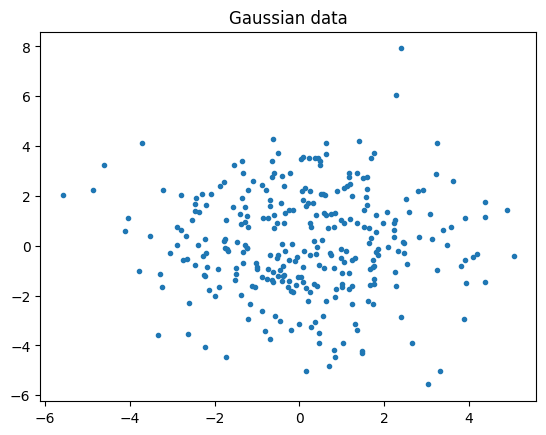

In [16]:
np.random.seed(1)
X,Y=gendata(300,'gau')
plt.plot(X,Y,'.')
plt.title('Gaussian data');

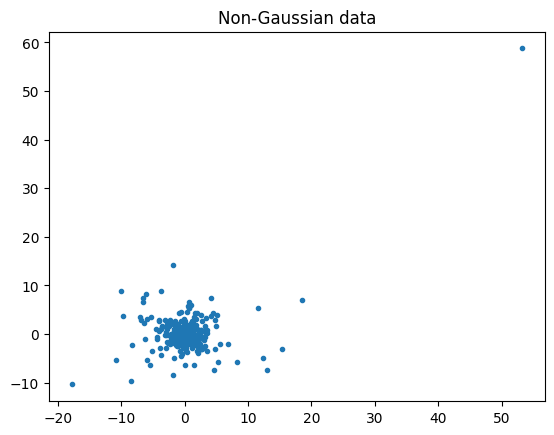

In [17]:
np.random.seed(4)
X,Y = gendata(300, 'nongau')
plt.plot(X,Y,'.');
plt.title('Non-Gaussian data');

Likelihood function for data under Gaussian model

In [18]:
def like_gau(p, data):
    # loglikelihood of the Gaussian model
    x,y = data
    x0, y0, size=p # parameters are centers of the gaussian and size
    if size <= 0:
        return 1e30
    loglike = (scipy.stats.norm(x0, size).logpdf(x)+
        scipy.stats.norm(y0, size).logpdf(y))
    return -loglike.sum()

Likelihood function for data under non-Gaussian model

In [19]:
def like_nongau(p, data):
    # PDF is 1/pi/size^2 * 1/(1+(r^2)/size^2)^2
    x, y = data
    x0, y0, size=p # parameters are centers  and size
    if size <= 0:
        return 1e30
    R = np.sqrt((x-x0)**2+(y-y0)**2)
    loglike = (np.log(1 / np.pi / size**2) -
        2*np.log(1 + (R**2 / size**2)))
    return -loglike.sum()

Function that maximizes a given likelihood on the data

In [20]:
def runfit(data, model):
    # run ML Gaussian or non-Gausian fit of the model to the data
    # return the value of log-likelihood
    if model == 'gau':
        like = like_gau
    else:
        like = like_nongau
    p0 = [1, 1, 5] # starting point
    ret= scipy.optimize.minimize(like, p0, jac=False, args=(data,),
                                method='Nelder-Mead')
    return ret['fun']

We are generating non-gaussian datasets with different
number of datapoints
And for each we are fitting gaussian/non-gaussian models and saving delta log-likelihood.


In [21]:
np.random.seed(1)
npts = np.arange(2, 100, 1) # number of points in the data
deltas = np.zeros(len(npts)) # delta log-likelihoods

for ii,i in enumerate(npts):
    data = gendata(i, 'nongau') # generate non-Gaussian data
    loglike_gau = -runfit(data, 'gau')
    loglike_nongau = -runfit(data, 'nongau')
    # save the delta-loglikelihood
    deltas[ii] = loglike_gau - loglike_nongau

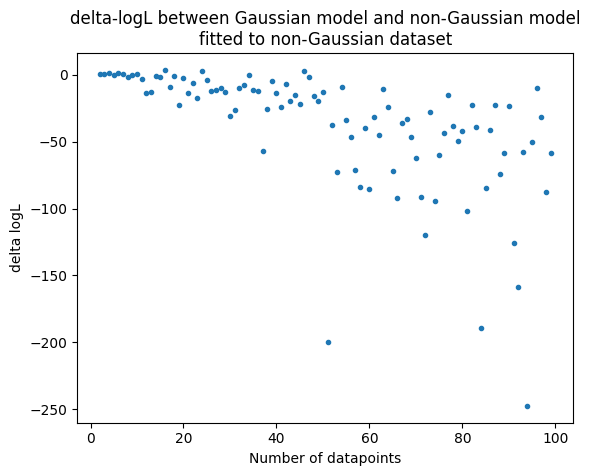

In [22]:
plt.plot(npts, deltas,'.')
#plt.xlim(1, 20);plt.ylim(-10,10)
plt.xlabel('Number of datapoints')
plt.ylabel('delta logL')
plt.title('''delta-logL between Gaussian model and non-Gaussian model
fitted to non-Gaussian dataset''');

We are generating Gaussian datasets with different number of datapoints
And for each we are fitting gaussian/non-gaussian models


In [23]:
np.random.seed(2)
npts2 = np.arange(2,100,1)
deltas2 = np.zeros(len(npts2))
for ii,i in enumerate(npts2):
    data = gendata(i, 'gau') # generate Gaussian data
    loglike_gau = -runfit(data, 'gau')
    loglike_nongau = -runfit(data, 'nongau')
    deltas2[ii] = loglike_gau - loglike_nongau

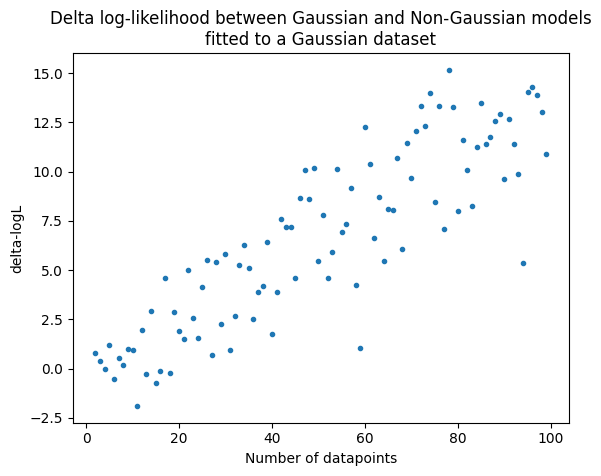

In [24]:
plt.plot(npts2, deltas2,'.')
#plt.xlim(0,20);plt.ylim(-10,10)
plt.xlabel('Number of datapoints')
plt.ylabel('delta-logL');
plt.title('''Delta log-likelihood between Gaussian and Non-Gaussian models
fitted to a Gaussian dataset''');